# Kmeans Madrid

### Librerias

In [900]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### Dataset

In [901]:
df = pd.read_csv('/Users/egmzvalerio/apps/iteso-data-analytics/data/raw/Madrid_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6369,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,85.0,5,106,2023-10-16,0.63,1,22,4,NaN
1,30320,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,130907,Dana,Centro,Sol,40.41476,-3.70418,Entire home/apt,65.0,5,172,2022-09-26,1.05,3,0,0,NaN
2,21853,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,83531,Abdel,Latina,Cármenes,40.40381,-3.74130,Private room,31.0,4,33,2018-07-15,0.30,2,135,0,NaN
3,24805,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,346366726,Alvaro,Centro,Universidad,40.42183,-3.70529,Entire home/apt,94.0,5,33,2023-11-06,0.30,1,168,8,NaN
4,30959,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,132883,Angela,Centro,Embajadores,40.41259,-3.70105,Entire home/apt,NaN,3,8,2017-05-30,0.08,1,0,0,NaN


### Eliminación de columnas inservibales

In [902]:
df = df.drop(['host_id', 'host_name', 'last_review', 'license', 'longitude', 'latitude', 'id'], axis = 1)
df.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Hispanoamérica,Private room,85.0,5,106,0.63,1,22,4
1,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Sol,Entire home/apt,65.0,5,172,1.05,3,0,0
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Cármenes,Private room,31.0,4,33,0.30,2,135,0
3,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Universidad,Entire home/apt,94.0,5,33,0.30,1,168,8
4,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,Centro,Embajadores,Entire home/apt,NaN,3,8,0.08,1,0,0


### Reemplazo de valores faltantes en el precio

In [903]:
df.isna().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                             3809
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5367
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

<Axes: >

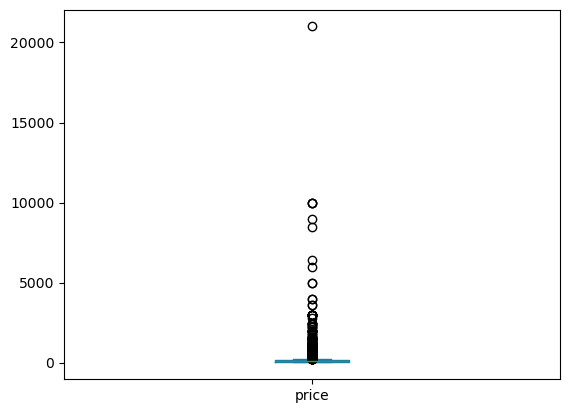

In [904]:
df['price'].plot(kind = 'box', )

In [905]:
df['price'].max()

21000.0

In [906]:
media_precio = df['price'].mean()
print('La media del precio', media_precio)

df['price'].fillna(media_precio, inplace = True)

La media del precio 129.01605778963835


### Comprobar que no haya valores faltantes

In [907]:
df.isna().sum()

name                                 0
neighbourhood_group                  0
neighbourhood                        0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 5367
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [908]:
Le = LabelEncoder()

### Creación de nuevas variables

In [909]:
df[['type_property', 'stars', 'bedrooms', 'beds', 'baths']] = df['name'].str.split(' · ', expand = True)
df.head()

,name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,type_property,stars,bedrooms,beds,baths
0,Rental unit in Madrid · ★4.88 · 1 bedroom · 1 ...,Chamartín,Hispanoamérica,Private room,85.000000,5,106,0.63,1,22,4,Rental unit in Madrid,★4.88,1 bedroom,1 bed,1 private bath
1,Rental unit in Madrid · ★4.63 · 1 bedroom · 2 ...,Centro,Sol,Entire home/apt,65.000000,5,172,1.05,3,0,0,Rental unit in Madrid,★4.63,1 bedroom,2 beds,1 bath
2,Rental unit in Madrid · ★4.58 · 1 bedroom · 1 ...,Latina,Cármenes,Private room,31.000000,4,33,0.30,2,135,0,Rental unit in Madrid,★4.58,1 bedroom,1 bed,1 bath
3,Rental unit in Madrid · ★4.91 · 6 bedrooms · 1...,Centro,Universidad,Entire home/apt,94.000000,5,33,0.30,1,168,8,Rental unit in Madrid,★4.91,6 bedrooms,1 bed,1 bath
4,Loft in Madrid · ★4.38 · 1 bedroom · 1 bed · 1...,Centro,Embajadores,Entire home/apt,129.016058,3,8,0.08,1,0,0,Loft in Madrid,★4.38,1 bedroom,1 bed,1 bath


### Tipo de propiedad

In [910]:
df['type_property'] = df['type_property'].str.split(' ')
for i in df['type_property']:
    df['type_property'] = i[0]
df['type_property']

0        Rental
1        Rental
2        Rental
3        Rental
4        Rental
          ...  
25538    Rental
25539    Rental
25540    Rental
25541    Rental
25542    Rental
Name: type_property, Length: 25543, dtype: object

### Rating

In [911]:
df['stars'] = df['stars'].str.replace('★', '')
df['stars']

0        4.88
1        4.63
2        4.58
3        4.91
4        4.38
         ... 
25538     New
25539     New
25540     New
25541     New
25542     New
Name: stars, Length: 25543, dtype: object

### Cantidad de baños

In [912]:
df['bedrooms'] = df['bedrooms'].astype(str).str[0]
df['bedrooms'] 

0        1
1        1
2        1
3        6
4        1
        ..
25538    2
25539    1
25540    1
25541    2
25542    1
Name: bedrooms, Length: 25543, dtype: object

### Cantidad de camas

In [913]:
df['beds'] = df['beds'].astype(str).str[0]
df['beds'] 

0        1
1        2
2        1
3        1
4        1
        ..
25538    3
25539    1
25540    1
25541    4
25542    3
Name: beds, Length: 25543, dtype: object

### Cantidad de duchas

In [914]:
df['baths'] = df['baths'].astype(str).str[0]
df['baths'] 

0        1
1        1
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: baths, Length: 25543, dtype: object

In [915]:
df = df.drop('name', axis = 1)

### Disponibilidad en meses

In [916]:
df["availability_365"] = df["availability_365"].apply(lambda x: round(x/30))
df["availability_365"]

0         1
1         0
2         4
3         6
4         0
         ..
25538    10
25539     6
25540    11
25541    11
25542    10
Name: availability_365, Length: 25543, dtype: int64

### Variable neigbourhood a variable categórica

In [917]:
Le.fit(df["neighbourhood"])
df["neighbourhood"] = Le.transform(df[["neighbourhood"]])
df["neighbourhood"]

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0         58
1        111
2         43
3        114
4         49
        ... 
25538    124
25539     56
25540     31
25541     13
25542     62
Name: neighbourhood, Length: 25543, dtype: int64

In [918]:
Le.fit(df["neighbourhood_group"])
df["neighbourhood_group"] = Le.transform(df[["neighbourhood_group"]])
df["neighbourhood_group"]

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0         4
1         3
2         9
3         3
4         3
         ..
25538    17
25539    14
25540    16
25541     5
25542     3
Name: neighbourhood_group, Length: 25543, dtype: int64

### Clasificación de reviews_ltm cada 10 reviews

<Axes: >

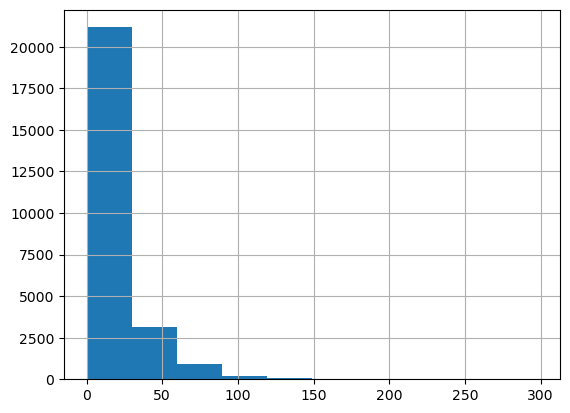

In [919]:
df["number_of_reviews_ltm"].hist()

In [920]:
def resenas(x):
    if x <= 10:
        X = 0
    elif x <= 20:
        X = 1
    elif x <= 30:
        X = 2
    elif x <= 40:
        X = 3
    elif x <= 50:
        X = 4
    elif x <= 60:
        X = 5
    elif x <= 70:
        X = 6
    elif x <= 80:
        X = 7
    elif x <= 90:
        X = 8
    else:
        X = 9
    return X

In [921]:
df["number_of_reviews_ltm"] = df["number_of_reviews_ltm"].apply(lambda x: resenas(x))
df["number_of_reviews_ltm"]

0        0
1        0
2        0
3        0
4        0
        ..
25538    0
25539    0
25540    0
25541    0
25542    0
Name: number_of_reviews_ltm, Length: 25543, dtype: int64

### Clasificación de anfitriones 

<Axes: >

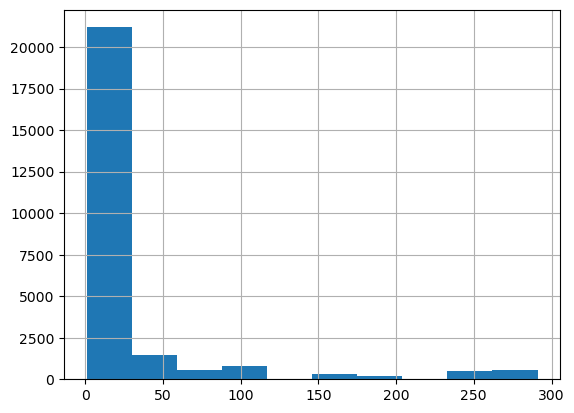

In [922]:
df["calculated_host_listings_count"].hist()

In [923]:
def anfitriones(x):
    if x <= 10:
        X = 0
    elif x <= 20:
        X = 1
    elif x <= 30:
        X = 2
    elif x <= 40:
        X = 3
    elif x <= 50:
        X = 4
    elif x <= 100:
        X = 5
    else:
        X = 6
    return X

In [924]:
df["calculated_host_listings_count"] = df["calculated_host_listings_count"].apply(lambda x: anfitriones(x))
df["calculated_host_listings_count"]

0        0
1        0
2        0
3        0
4        0
        ..
25538    5
25539    5
25540    4
25541    6
25542    5
Name: calculated_host_listings_count, Length: 25543, dtype: int64

### Clasificación de reseña por mes

<Axes: >

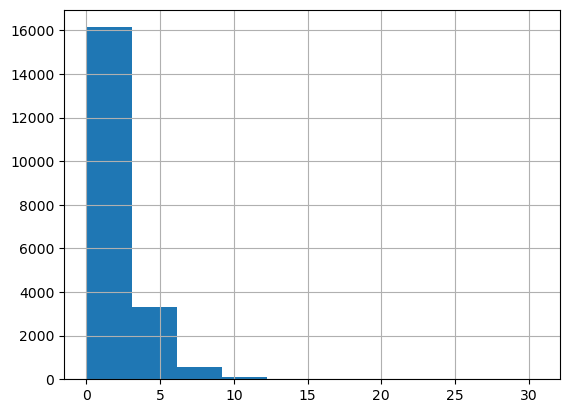

In [925]:
df["reviews_per_month"].hist()

In [926]:
def resenas_mes(x):
    if x <= 2:
        X = 1
    elif x <= 4:
        X = 2
    elif x <= 6:
        X = 3
    elif x <= 8:
        X = 4
    elif x <= 10:
        X = 5
    else:
        X = 6
    return X

In [927]:
df["reviews_per_month"] = df["reviews_per_month"].fillna(0)
df["reviews_per_month"] = df["reviews_per_month"].apply(lambda x: resenas_mes(x))
df["reviews_per_month"]

0        1
1        1
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: reviews_per_month, Length: 25543, dtype: int64

### Clasificación de cantidad de reseñas

<Axes: >

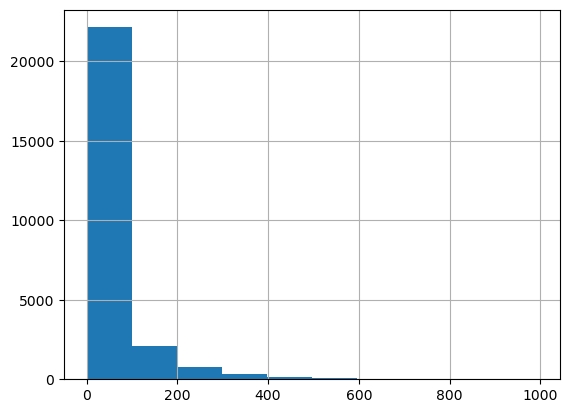

In [928]:
df["number_of_reviews"].hist()

In [929]:
def resenas_cuan(x):
    if x <= 25:
        X = 0
    if x <= 50:
        X = 1
    elif x <= 100:
        X = 2
    elif x <= 150:
        X = 3
    elif x <= 200:
        X = 4
    else:
        X = 5
    return X

In [930]:
df["number_of_reviews"] = df["number_of_reviews"].apply(lambda x: resenas_cuan(x))
df["number_of_reviews"]

0        3
1        4
2        1
3        1
4        1
        ..
25538    1
25539    1
25540    1
25541    1
25542    1
Name: number_of_reviews, Length: 25543, dtype: int64

### Cambio a variable categorica el tipo de cuarto

In [931]:
Le.fit(df["room_type"])
df["room_type"] = Le.transform(df[["room_type"]])
df["room_type"]
df

/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,type_property,stars,bedrooms,beds,baths
0,4,58,2,85.000000,5,3,1,0,1,0,Rental,4.88,1,1,1
1,3,111,0,65.000000,5,4,1,0,0,0,Rental,4.63,1,2,1
2,9,43,2,31.000000,4,1,1,0,4,0,Rental,4.58,1,1,1
3,3,114,0,94.000000,5,1,1,0,6,0,Rental,4.91,6,1,1
4,3,49,0,129.016058,3,1,1,0,0,0,Rental,4.38,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25538,17,124,0,120.000000,1,1,1,5,10,0,Rental,New,2,3,1
25539,14,56,0,120.000000,1,1,1,5,6,0,Rental,New,1,1,1
25540,16,31,0,171.000000,1,1,1,4,11,0,Rental,New,1,1,1
25541,5,13,0,74.000000,31,1,1,6,11,0,Rental,New,2,4,1


### Cambio a variable categorica el tipo de propiedad

In [932]:
Le.fit(df["type_property"])
df["type_property"] = Le.transform(df[["type_property"]])
df["type_property"]


/Users/egmzvalerio/anaconda3/envs/iteso/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


0        0
1        0
2        0
3        0
4        0
        ..
25538    0
25539    0
25540    0
25541    0
25542    0
Name: type_property, Length: 25543, dtype: int64

### Kmeans

In [939]:
X = df.values

array([[4, 58, 2, ..., '1', '1', '1'],
       [3, 111, 0, ..., '1', '2', '1'],
       [9, 43, 2, ..., '1', '1', '1'],
       ...,
       [16, 31, 0, ..., '1', '1', '1'],
       [5, 13, 0, ..., '2', '4', '1'],
       [3, 62, 0, ..., '1', '3', '1']], dtype=object)